In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)


pd.options.mode.chained_assignment = None 

In [3]:
scores = pd.read_csv('scores.csv')

In [4]:
scores

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0
5,condition_6,7,1,35-39,2.0,2.0,2.0,6-10,1.0,2.0,18.0,15.0
6,condition_7,11,1,20-24,1.0,NaN,2.0,11-15,2.0,1.0,24.0,25.0
7,condition_8,5,2,25-29,2.0,NaN,2.0,11-15,1.0,2.0,20.0,16.0
8,condition_9,13,2,45-49,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0
9,condition_10,9,2,45-49,2.0,2.0,2.0,6-10,1.0,2.0,28.0,21.0


In [9]:
scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   number     55 non-null     object 
 1   days       55 non-null     int64  
 2   gender     55 non-null     int64  
 3   age        55 non-null     object 
 4   afftype    23 non-null     float64
 5   melanch    20 non-null     float64
 6   inpatient  23 non-null     float64
 7   edu        53 non-null     object 
 8   marriage   23 non-null     float64
 9   work       23 non-null     float64
 10  madrs1     23 non-null     float64
 11  madrs2     23 non-null     float64
dtypes: float64(7), int64(2), object(3)
memory usage: 5.3+ KB


In [10]:
scores.isnull().sum()  #boş olanları seçmek

number        0
days          0
gender        0
age           0
afftype      32
melanch      35
inpatient    32
edu           2
marriage     32
work         32
madrs1       32
madrs2       32
dtype: int64

In [12]:
scores['DeltaMADRS'] = scores.madrs2 - scores.madrs1
scores.head()

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,DeltaMADRS
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,0.0
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0,-13.0
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0,1.0
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0,-4.0
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0,0.0


In [13]:
scores.edu = scores['edu'].replace(' ', np.NaN)
scores

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,DeltaMADRS
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,0.0
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0,-13.0
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0,1.0
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0,-4.0
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0,0.0
5,condition_6,7,1,35-39,2.0,2.0,2.0,6-10,1.0,2.0,18.0,15.0,-3.0
6,condition_7,11,1,20-24,1.0,NaN,2.0,11-15,2.0,1.0,24.0,25.0,1.0
7,condition_8,5,2,25-29,2.0,NaN,2.0,11-15,1.0,2.0,20.0,16.0,-4.0
8,condition_9,13,2,45-49,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0,0.0
9,condition_10,9,2,45-49,2.0,2.0,2.0,6-10,1.0,2.0,28.0,21.0,-7.0


In [14]:
scores.age = scores.age.astype('category')
scores.gender = scores.gender.astype('category')
scores.edu = scores.edu.astype('category')
scores.afftype = scores.afftype.astype('category')
scores.melanch = scores.melanch.astype('category')
scores.inpatient = scores.inpatient.astype('category')
scores.marriage = scores.marriage.astype('category')
scores.work = scores.work.astype('category')
scores.head()

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,DeltaMADRS
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,0.0
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0,-13.0
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0,1.0
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0,-4.0
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0,0.0


In [15]:
scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   number      55 non-null     object  
 1   days        55 non-null     int64   
 2   gender      55 non-null     category
 3   age         55 non-null     category
 4   afftype     23 non-null     category
 5   melanch     20 non-null     category
 6   inpatient   23 non-null     category
 7   edu         22 non-null     category
 8   marriage    23 non-null     category
 9   work        23 non-null     category
 10  madrs1      23 non-null     float64 
 11  madrs2      23 non-null     float64 
 12  DeltaMADRS  23 non-null     float64 
dtypes: category(8), float64(3), int64(1), object(1)
memory usage: 3.9+ KB


In [16]:
scores.gender = scores['gender'].cat.rename_categories({1.0 : 'female',2.0:'male'})
scores.afftype = scores['afftype'].cat.rename_categories({1.0 : 'bipolar II',2.0:'unipolar', 3: 'bipolar I'})
scores.melanch = scores['melanch'].cat.rename_categories({1.0 : 'melancholia',2.0:'No melancholia'})
scores.inpatient = scores['inpatient'].cat.rename_categories({1.0 : 'inpatient',2.0:'outpatient'})
scores.marriage = scores['marriage'].cat.rename_categories({1.0 : 'married/cohabitating',2.0:'single'})
scores.work = scores['work'].cat.rename_categories({1.0 : 'Work/Study',2.0:'Unemployed/Sick leave/Pension'})
scores

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,DeltaMADRS
0,condition_1,11,male,35-39,unipolar,No melancholia,outpatient,6-10,married/cohabitating,Unemployed/Sick leave/Pension,19.0,19.0,0.0
1,condition_2,18,male,40-44,bipolar II,No melancholia,outpatient,6-10,single,Unemployed/Sick leave/Pension,24.0,11.0,-13.0
2,condition_3,13,female,45-49,unipolar,No melancholia,outpatient,6-10,single,Unemployed/Sick leave/Pension,24.0,25.0,1.0
3,condition_4,13,male,25-29,unipolar,No melancholia,outpatient,11-15,married/cohabitating,Work/Study,20.0,16.0,-4.0
4,condition_5,13,male,50-54,unipolar,No melancholia,outpatient,11-15,single,Unemployed/Sick leave/Pension,26.0,26.0,0.0
5,condition_6,7,female,35-39,unipolar,No melancholia,outpatient,6-10,married/cohabitating,Unemployed/Sick leave/Pension,18.0,15.0,-3.0
6,condition_7,11,female,20-24,bipolar II,NaN,outpatient,11-15,single,Work/Study,24.0,25.0,1.0
7,condition_8,5,male,25-29,unipolar,NaN,outpatient,11-15,married/cohabitating,Unemployed/Sick leave/Pension,20.0,16.0,-4.0
8,condition_9,13,male,45-49,bipolar II,NaN,outpatient,6-10,married/cohabitating,Unemployed/Sick leave/Pension,26.0,26.0,0.0
9,condition_10,9,male,45-49,unipolar,No melancholia,outpatient,6-10,married/cohabitating,Unemployed/Sick leave/Pension,28.0,21.0,-7.0


In [19]:
scores_condition = scores[scores.number.str.contains('condition')].copy()
scores_condition.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 0 to 22
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   number      23 non-null     object  
 1   days        23 non-null     int64   
 2   gender      23 non-null     category
 3   age         23 non-null     category
 4   afftype     23 non-null     category
 5   melanch     20 non-null     category
 6   inpatient   23 non-null     category
 7   edu         22 non-null     category
 8   marriage    23 non-null     category
 9   work        23 non-null     category
 10  madrs1      23 non-null     float64 
 11  madrs2      23 non-null     float64 
 12  DeltaMADRS  23 non-null     float64 
dtypes: category(8), float64(3), int64(1), object(1)
memory usage: 2.5+ KB


In [20]:
scores_control = scores[scores.number.str.contains('control')].copy()
scores_control.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 23 to 54
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   number      32 non-null     object  
 1   days        32 non-null     int64   
 2   gender      32 non-null     category
 3   age         32 non-null     category
 4   afftype     0 non-null      category
 5   melanch     0 non-null      category
 6   inpatient   0 non-null      category
 7   edu         0 non-null      category
 8   marriage    0 non-null      category
 9   work        0 non-null      category
 10  madrs1      0 non-null      float64 
 11  madrs2      0 non-null      float64 
 12  DeltaMADRS  0 non-null      float64 
dtypes: category(8), float64(3), int64(1), object(1)
memory usage: 3.0+ KB


In [ ]:
features_num = ['days','madrs1','madrs2','DeltaMADRS']
features_cat = ['age', 'gender', 'afftype', 'melanch', 'inpatient', 'edu', 'marriage', 'work']

MADRS interpretation

0 to 6: normal range (no depression),
7 to 19 : mild depression
20 to 34: moderate depression
35 and greater: severe depression
60 or greater: “very severe depression

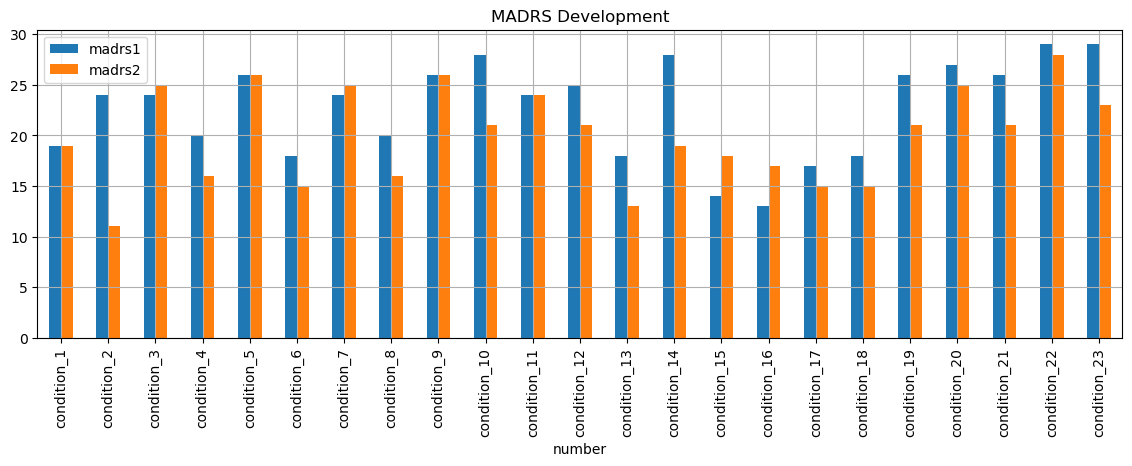

In [22]:
temp_plot_paras = plt.rcParams['figure.figsize']

plt.rcParams['figure.figsize'] = (14,4)
scores_condition.plot(x='number', y=['madrs1','madrs2'], kind='bar')
plt.title('MADRS Development')
plt.grid()
plt.show()

plt.rcParams['figure.figsize'] = temp_plot_paras  ## MADRS puanlarının bar grafiği (öncesi/sonrası)

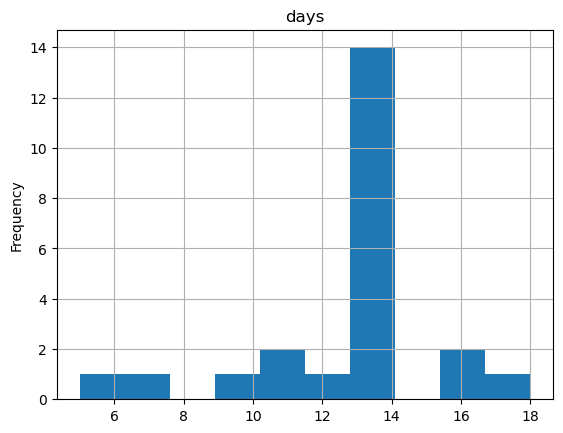

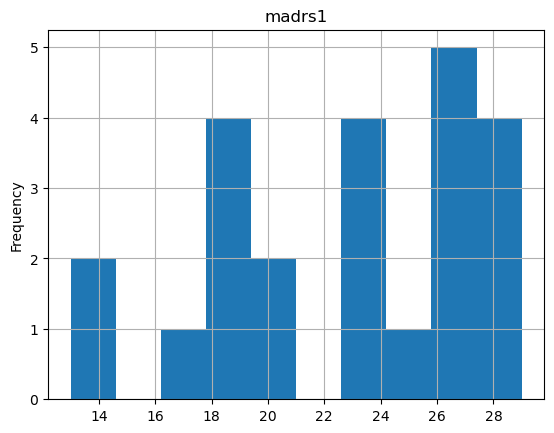

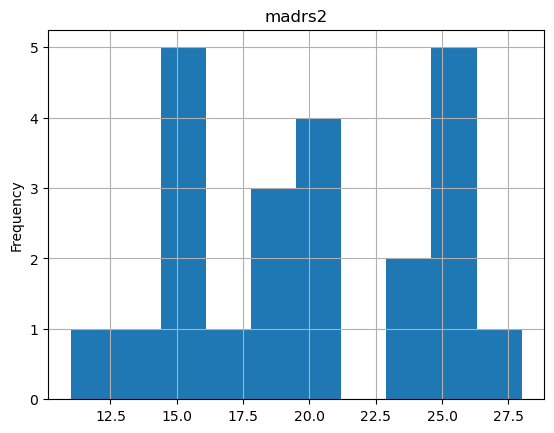

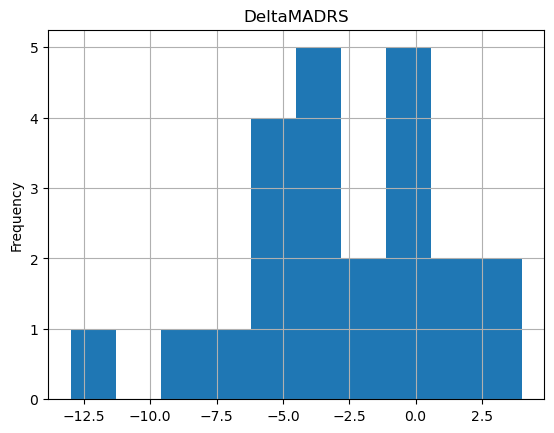

In [23]:
for f in features_num:
    scores_condition[f].plot(kind='hist')
    plt.title(f)
    plt.grid()
    plt.show()

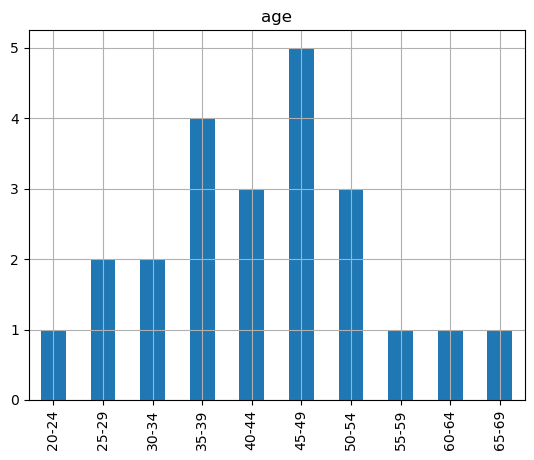

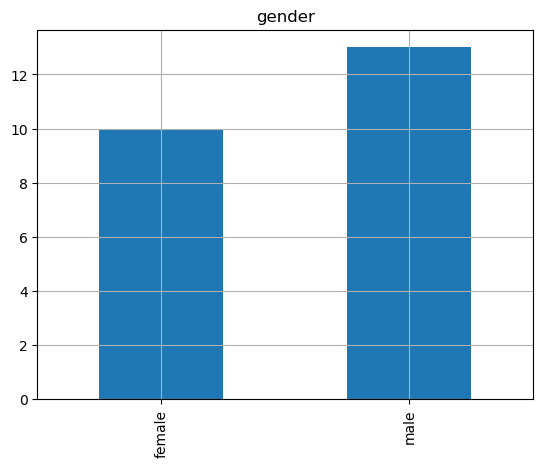

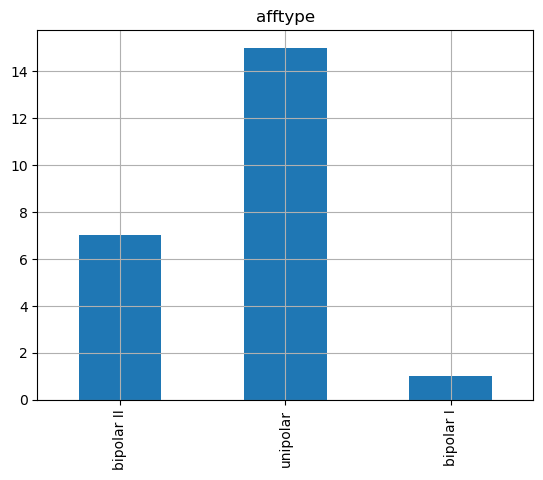

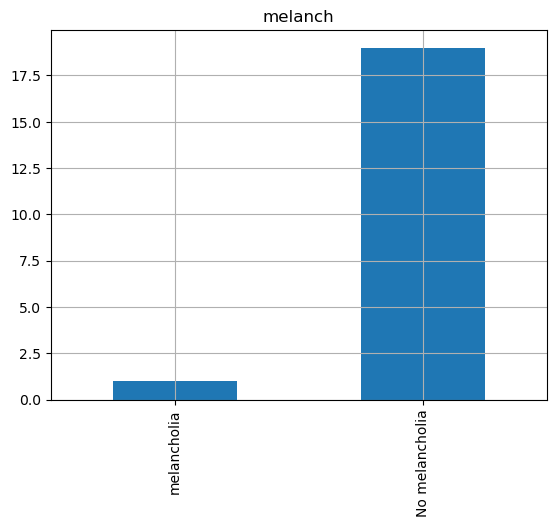

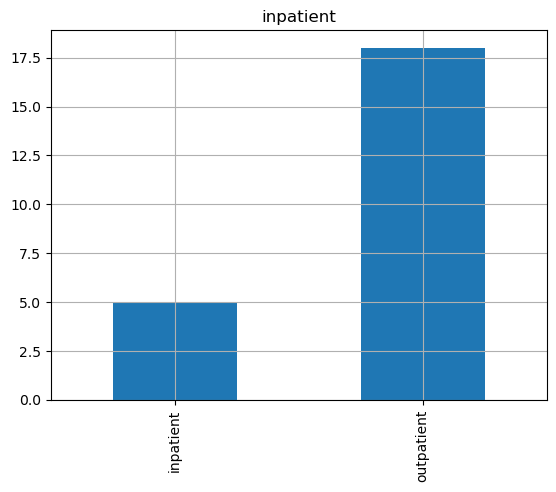

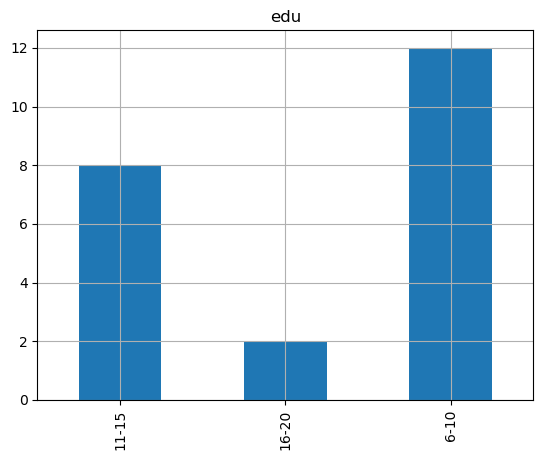

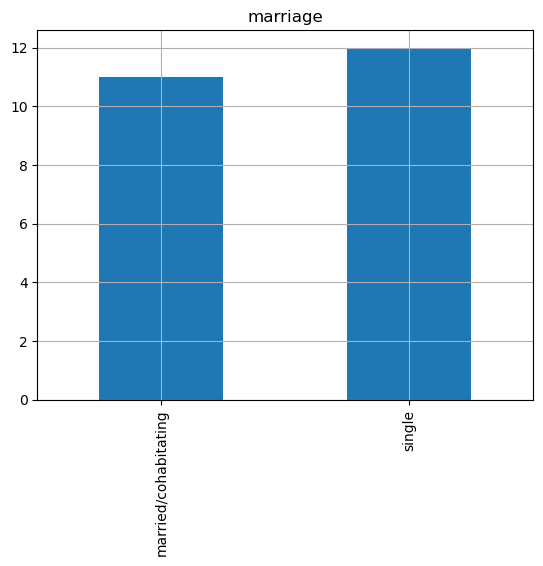

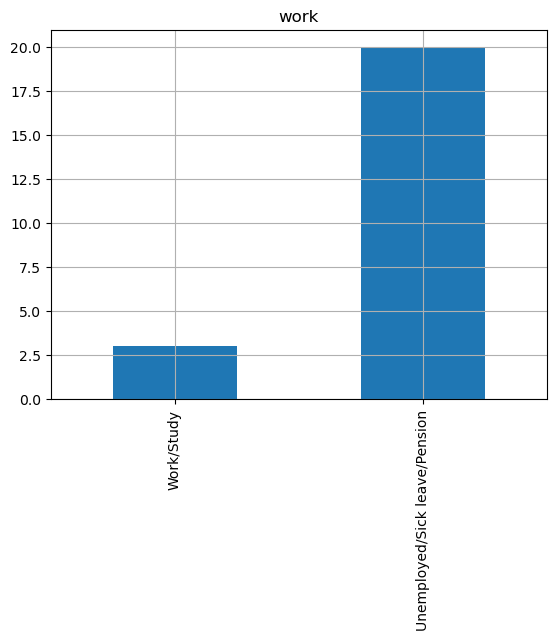

In [24]:
for f in features_cat:
    scores_condition[f].value_counts().sort_index().plot(kind='bar')
    plt.title(f)
    plt.grid()
    plt.show()